<a href="https://colab.research.google.com/github/himanshusoni121/summer-git-assignment/blob/main/Unsupervised_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [10]:
df = pd.read_csv("mall.csv")

In [12]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [11]:
df = df.drop(columns = ['CustomerID', 'Genre'])

In [7]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [13]:
x = df.iloc[:,[0,1]].values

In [14]:
from sklearn.cluster import KMeans

In [15]:
import matplotlib.pyplot as plt


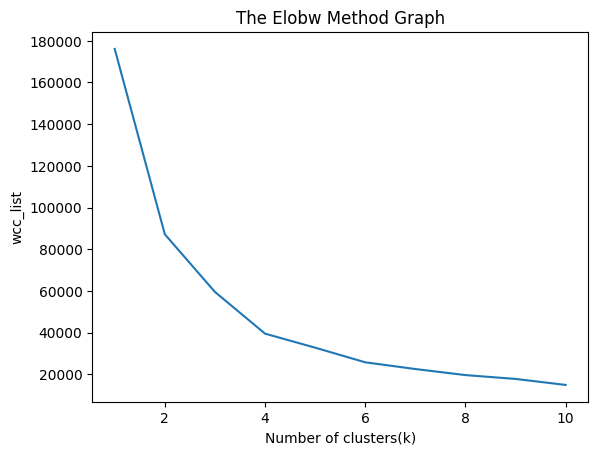

In [16]:
a=[]

for i in range(plt.title('The Elobw Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcc_list')
plt.show()1,11):
  b=KMeans(n_clusters = i , init = 'k-means++' , random_state = 42)
  b.fit(x)
  a.append(b.inertia_)

plt.plot(range(1,11) , a)



# **From** the above plot we can see the elbow point is at 4 . So the number of clusters here will be 4

In [17]:
b= KMeans(n_clusters=4, init='k-means++',random_state=42)
y_predict=b.fit_predict(x)

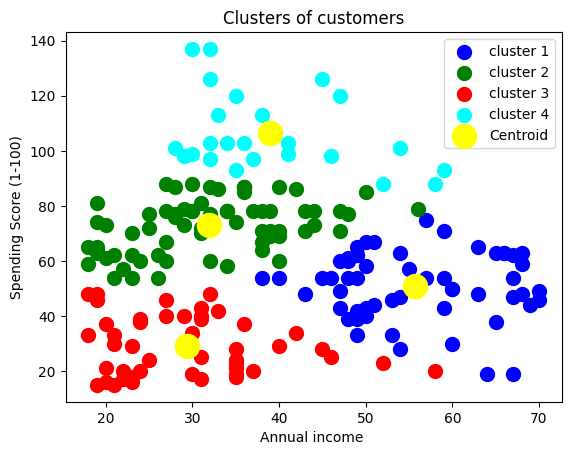

In [20]:
#visualaizing the clusters
plt.scatter(x[y_predict == 0,0], x[y_predict == 0,1] , s= 100, c='blue', label = 'cluster 1') # for first cluster
plt.scatter(x[y_predict == 1,0], x[y_predict == 1,1] , s= 100, c='green', label = 'cluster 2') # for second cluster
plt.scatter(x[y_predict == 2,0], x[y_predict == 2,1] , s= 100, c='red', label = 'cluster 3') # for third cluster
plt.scatter(x[y_predict == 3,0], x[y_predict == 3,1] , s= 100, c='cyan', label = 'cluster 4') # for fourth cluster

plt.scatter(b.cluster_centers_[:,0], b.cluster_centers_[:,1], s = 300 , c='yellow',
            label = 'Centroid')

plt.title('Clusters of customers')
plt.xlabel('Annual income ')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# 2nd unsupervised model

In [21]:
import numpy as np
import pandas as pd

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report

In [28]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [29]:
df = df.drop(columns = ['User ID' , 'Gender'])

In [31]:
#df.head()

In [33]:
x= df.drop(columns = ['Purchased'], axis = 1)
y= df['Purchased']

In [35]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 ,
                                                       random_state = 42)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [36]:
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [37]:
pipe.fit(x_train , y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [38]:
y_pred = pipe.predict(x_test)

In [39]:
acc= accuracy_score(y_test , y_pred)
print(acc)

0.8875
